<a href="https://colab.research.google.com/github/luttism/Bootcamp_data_science/blob/main/modulo01_aula01_aula02_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula 01 - Bootcamp - Data Science - Alura**
------

Luciana Souto Mofatto

1) Obteve os dados do banco de dados "Datasus" gerado no Tabnet - Gastos de Ambiente hospitalar pelo Governo Brasileiro - a partir de 2008. Os dados foram exportados no format "csv" (comma-separated-values).

2) Importar os dados usando a biblioteca do Python chamada "pandas" com alias "pd":

In [89]:
import pandas as pd

dados = pd.read_csv("/content/A151346189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
#mostra as 5 primeiras linhas do dataframe "dados"
dados.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

3) Formatar os dados para duas casas decimais, pois, por "default" é mostrado em notação científica.

In [76]:
pd.options.display.float_format = "{:.2f}".format

**4) Desafio da aula 01: selecionar somente os valores de Janeiro de 2008?**

Levando em consideração que é um dataframe, aqui está uma das soluções: 

In [77]:
dados[["Unidade da Federação", "2008/Jan"]]

,Unidade da Federação,2008/Jan
0,11 Rondônia,1388528.39
1,12 Acre,902416.00
2,13 Amazonas,4735529.42
3,14 Roraima,657889.53
4,15 Pará,18864744.11
5,16 Amapá,1120973.34
6,17 Tocantins,3441592.69
7,21 Maranhão,10723506.39
8,22 Piauí,7985142.43
9,23 Ceará,15539821.90


In [78]:
#média do mês de Janeiro
dados["2008/Jan"].mean()

15126846.638148146

5) Na aula de "Visualizações e gráficos", foi gerado o gráfico abaixo:

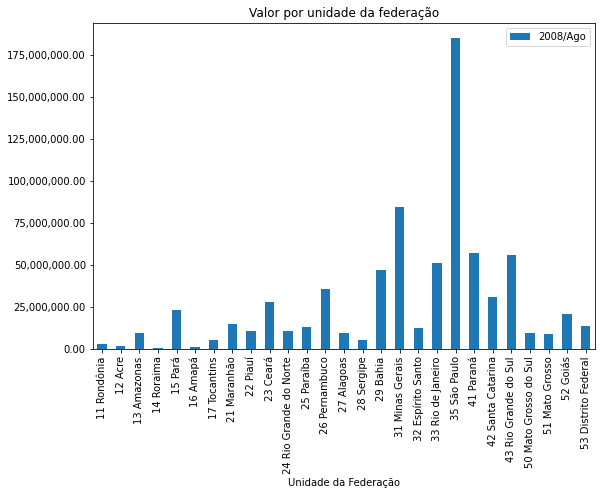

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()

**6) Desafio 1 da aula "Visualizações e gráficos": escolher um título mais descritivo, que passe a mensagem adequada**

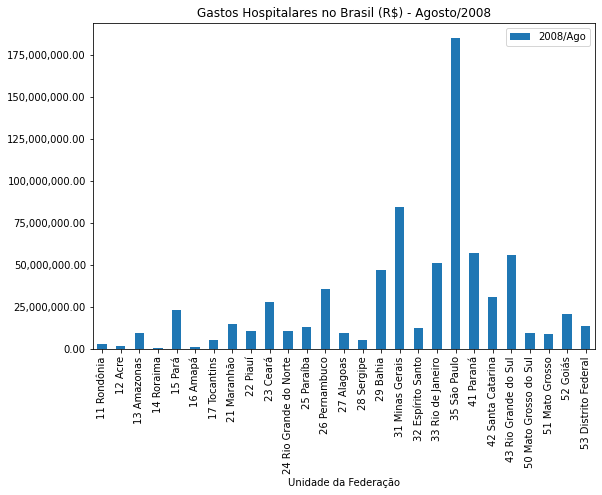

In [28]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Gastos Hospitalares no Brasil (R$) - Agosto/2008")
plt.show()

**7) Desafio 2 da aula "Visualizações e gráficos": faça a mesma análise pro mês mais recente.**

Levando em consideração que "dados" é um *dataframe*, pode-se utilizar do método "columns" (colunas) para saber qual a última data lançada.

Também pode fazer uso do comando "len" (length = tamanho), para pegar os dados da última coluna. No caso, uso "len(dados.columns)-1" porque os índices no python se iniciam em 0.

In [42]:
print(dados.columns)

Index(['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set',
       ...
       '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai',
       '2020/Jun', '2020/Jul', '2020/Ago', 'Total'],
      dtype='object', length=154)


In [44]:
ultima_coluna = dados[dados.columns[len(dados.columns)-1]]
ultima_coluna

0      929129659.72
1      420668039.63
2     1771654871.23
3      305010883.18
4     4437115730.71
5      291637984.75
6      999998621.85
7     3632860959.84
8     2130616492.35
9     6197357245.98
10    2477372149.60
11    2470550104.25
12    8046954289.39
13    2104405303.11
14    1130337049.71
15    9193802684.16
16   19160106499.88
17    3139189177.73
18    9696364115.11
19   38929549655.89
20   13786964617.27
21    7324100054.96
22   11958647088.33
23    2172157981.36
24    2036923784.59
25    4657350310.70
26    2429933198.76
Name: Total, dtype: float64

Ao rodar o comando, foi observado que a coluna visualizada é a de "Total", mas gostaria de plotar a penúltima. Então, uso o comando "len(dados.columns)-2", para realmente obter os dados do último mês lançado.

In [46]:
ultima_coluna = dados[dados.columns[len(dados.columns)-2]]
ultima_coluna

0      10285455.78
1                -
2      14726443.67
3       2826486.18
4      39911193.02
5       2942273.94
6       8240261.38
7      28587541.78
8      23210624.20
9      59808605.59
10     24929930.72
11     22130016.81
12     75704177.72
13     19754741.78
14     11014180.89
15     80793117.08
16    168024412.95
17     32188873.88
18     95274486.35
19    346512263.17
20    129375911.54
21     63972379.36
22    101374341.51
23     19241624.02
24     17790649.87
25     43984702.05
26     26526196.39
Name: 2020/Ago, dtype: object

In [80]:
dados[["Unidade da Federação", "2020/Ago"]]

,Unidade da Federação,2020/Ago
0,11 Rondônia,10285455.78
1,12 Acre,-
2,13 Amazonas,14726443.67
3,14 Roraima,2826486.18
4,15 Pará,39911193.02
5,16 Amapá,2942273.94
6,17 Tocantins,8240261.38
7,21 Maranhão,28587541.78
8,22 Piauí,23210624.20
9,23 Ceará,59808605.59


Então, o gráfico a ser gerado será "Unidades da Federação" no eixo X e valores de gastos hospitalares no eixo Y, referentes ao mês de Agosto de 2020.

In [87]:
import numpy as np
import pandas as pd

dados_modificados = dados
dados_modificados.replace("-" , float("NaN"), inplace = True)
dados_modificados['2020/Ago'] = pd.to_numeric(dados_modificados['2020/Ago'])
dados_modificados[["Unidade da Federação","2020/Ago"]]

,Unidade da Federação,2020/Ago
0,11 Rondônia,10285455.78
1,12 Acre,nan
2,13 Amazonas,14726443.67
3,14 Roraima,2826486.18
4,15 Pará,39911193.02
5,16 Amapá,2942273.94
6,17 Tocantins,8240261.38
7,21 Maranhão,28587541.78
8,22 Piauí,23210624.20
9,23 Ceará,59808605.59


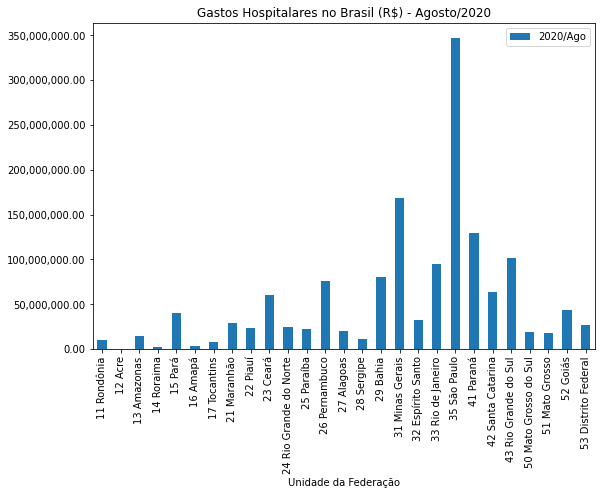

In [88]:
ax = dados_modificados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Gastos Hospitalares no Brasil (R$) - Agosto/2020")
plt.show()